# Case study on Supervised learning

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Read the dataset to the python environment

In [3]:
iris= pd.read_excel('iris1.xls')
iris.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.shape

(150, 5)

### 2. Do necessary pre-processing steps

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

### Filling the missing values

In [7]:
iris['SL']=iris['SL'].fillna(iris['SL'].median())
iris['SW']=iris['SW'].fillna(iris['SW'].median())
iris['PL']=iris['PL'].fillna(iris['PL'].median())

In [8]:
iris.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [9]:
iris.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

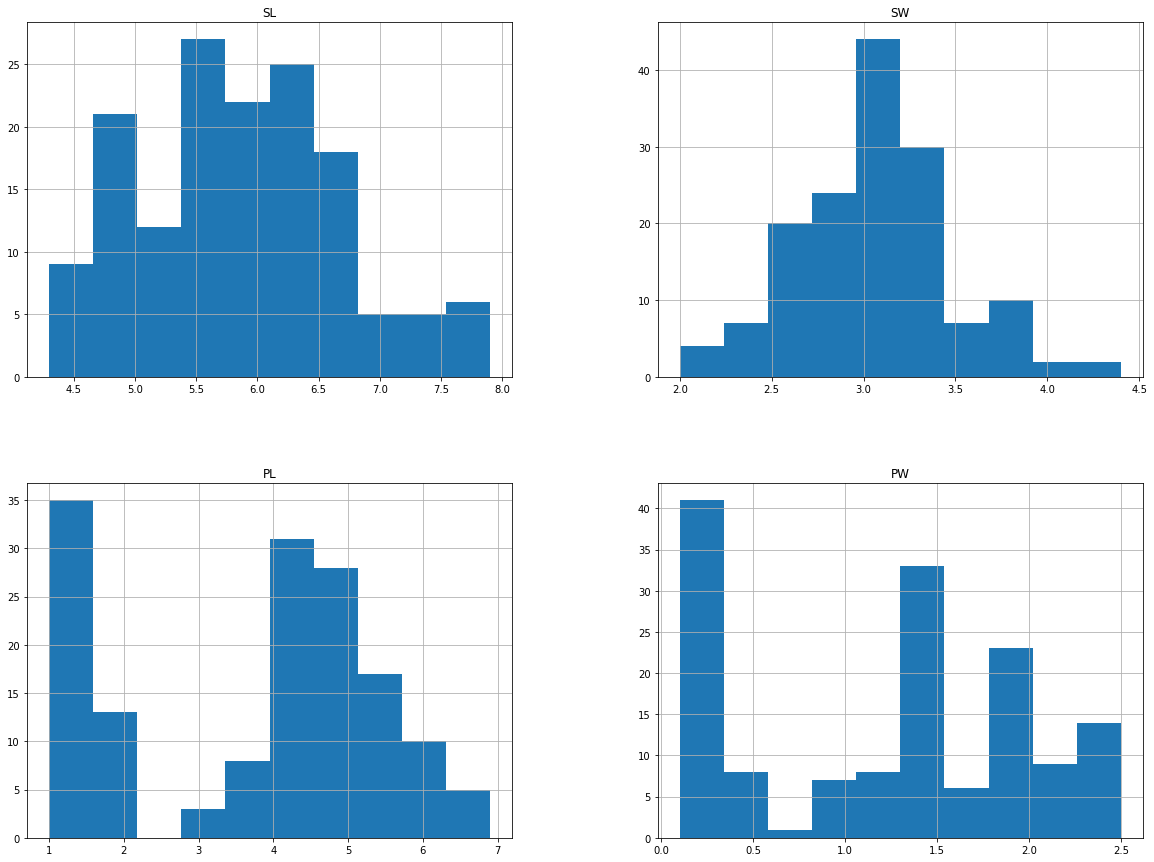

In [10]:
freqgraph=iris.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [11]:
iris.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

### Checking for outliers

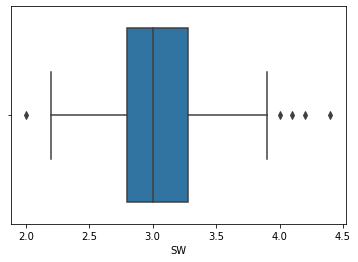

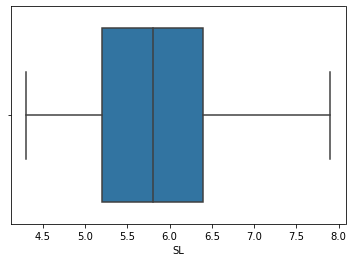

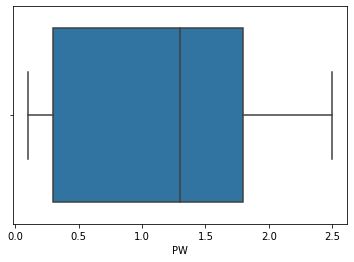

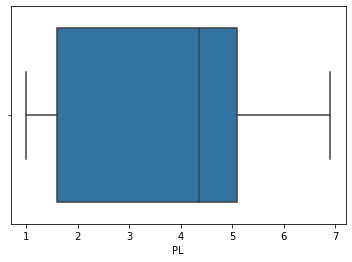

In [12]:
for i in ['SW','SL', 'PW','PL']:
    sns.boxplot(x=iris[i])
    plt.show()

### Handling outliers in SW

In [13]:
Q1=np.percentile(iris['SW'],25,interpolation='midpoint')

Q3=np.percentile(iris['SW'],75,interpolation='midpoint')

In [14]:
IQR=Q3-Q1
low_lim=Q1-(1.5*IQR)
up_lim=Q3+(1.5*IQR)

In [15]:
outlier=[]
for x in iris['SW']:
    if(x>up_lim)or(x<low_lim):
        outlier.append(x)

In [16]:
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [17]:
ind1=iris['SW']>up_lim
iris.loc[ind1].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [18]:
ind2=iris['SW']<low_lim
iris.loc[ind2].index

Int64Index([60], dtype='int64')

In [19]:
iris.drop([14, 15, 32, 33,60],inplace=True)

<AxesSubplot:xlabel='SW'>

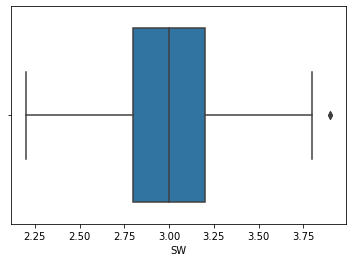

In [20]:
sns.boxplot(x=iris['SW'])

In [21]:
iris['Classification'].value_counts()

Iris-virginica     50
Iris-versicolor    49
Iris-setosa        46
Name: Classification, dtype: int64

In [22]:
iris.describe()

,SL,SW,PL,PW
count,145.000000,145.000000,145.000000,145.000000
mean,5.867586,3.023448,3.847586,1.226897
std,0.816827,0.374354,1.712265,0.758219
min,4.300000,2.200000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.200000,5.100000,1.800000
max,7.900000,3.900000,6.900000,2.500000


In [23]:
iris.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [24]:
x=iris.drop(['Classification'],axis=1)## data splitting
y = iris['Classification']

In [25]:
x['mean'] = x[['SW', 'SL', 'PW', 'PL']].mean(axis = 1)
x['sum'] = x[['SW', 'SL', 'PW', 'PL']].sum(axis = 1)

In [26]:
x.columns

Index(['SL', 'SW', 'PL', 'PW', 'mean', 'sum'], dtype='object')

### 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

In [28]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

### 3.1 Logistic Regression Model

In [29]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)

from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report

print("accuracy score",accuracy_score(y_test,y_pred))

accuracy score 0.9459459459459459


In [30]:
print("precision is :",precision_score(y_test,y_pred,average='macro'))
print("recall is :",recall_score(y_test,y_pred,average='macro'))
print("F1 score is :",f1_score(y_test,y_pred,average='macro'))

precision is : 0.9407407407407407
recall is : 0.9391534391534391
F1 score is : 0.9391230310770541


In [31]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.93      0.96        14
Iris-versicolor       0.89      0.89      0.89         9
 Iris-virginica       0.93      1.00      0.97        14

       accuracy                           0.95        37
      macro avg       0.94      0.94      0.94        37
   weighted avg       0.95      0.95      0.95        37

[[13  1  0]
 [ 0  8  1]
 [ 0  0 14]]


In [32]:
log=[]
log.append(['Logistic Regression',round(f1_score(y_test,y_pred,average='macro'),5),round(accuracy_score(y_test,y_pred),5),round(precision_score(y_test,y_pred,average='macro'),5),round(recall_score(y_test,y_pred,average='macro'),5)])


### KNN Classifier Model

In [33]:
from sklearn.neighbors import KNeighborsClassifier

acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)
    
acc_values

[0.918918918918919,
 0.918918918918919,
 0.9459459459459459,
 0.9459459459459459,
 0.9459459459459459,
 0.918918918918919,
 0.9459459459459459,
 0.918918918918919,
 0.918918918918919,
 0.918918918918919,
 0.918918918918919,
 0.918918918918919]

Text(0, 0.5, 'accuracy value')

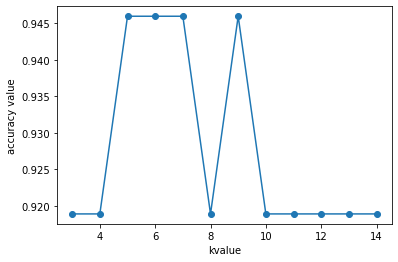

In [34]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('kvalue')
plt.ylabel('accuracy value')

In [35]:
classifier = KNeighborsClassifier(n_neighbors = 8, metric='minkowski')
classifier.fit(x_train, y_train)
y_pred =  classifier.predict(x_test)

print("Accuracy is :",accuracy_score(y_test,y_pred))
print("Precision is :",precision_score(y_test,y_pred,average='macro'))
print("Recall is :",recall_score(y_test,y_pred,average='macro'))
print("F1 score is :",f1_score(y_test,y_pred,average='macro'))


Accuracy is : 0.918918918918919
Precision is : 0.9095238095238095
Recall is : 0.9153439153439153
F1 score is : 0.9112132182307621


In [36]:
confusion_matrix(y_test,y_pred)

array([[13,  1,  0],
       [ 0,  8,  1],
       [ 0,  1, 13]], dtype=int64)

In [37]:
log.append(['KNN Classification',round(f1_score(y_test,y_pred,average='macro'),5),round(accuracy_score(y_test,y_pred),5),round(precision_score(y_test,y_pred,average='macro'),5),round(recall_score(y_test,y_pred,average='macro'),5)])


### Decision Tree Model

In [38]:
from sklearn.tree import DecisionTreeClassifier

dt_model=DecisionTreeClassifier()

dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)

print("Accuracy is :",accuracy_score(y_test,y_pred))
print("Precision is :",precision_score(y_test,y_pred,average='macro'))
print("Recall is :",recall_score(y_test,y_pred,average='macro'))
print("F1 score is :",f1_score(y_test,y_pred,average='macro'))

Accuracy is : 0.9459459459459459
Precision is : 0.9393939393939394
Recall is : 0.9523809523809524
F1 score is : 0.9410256410256409


In [39]:
print(classification_report(y_test, y_pred))
print("Confusion Matrix is \n",confusion_matrix(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.82      1.00      0.90         9
 Iris-virginica       1.00      0.86      0.92        14

       accuracy                           0.95        37
      macro avg       0.94      0.95      0.94        37
   weighted avg       0.96      0.95      0.95        37

Confusion Matrix is 
 [[14  0  0]
 [ 0  9  0]
 [ 0  2 12]]


In [40]:
log.append(['Decision Tree',round(f1_score(y_test,y_pred,average='macro'),5),round(accuracy_score(y_test,y_pred),5),round(precision_score(y_test,y_pred,average='macro'),5),round(recall_score(y_test,y_pred,average='macro'),5)])


### 3.4 SVM Classifier model

#### 3.4.1 SVM LINEAR MODEL

In [41]:
from sklearn.svm import SVC

svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
y_predict=svm_linear.predict(x_test)

print("Accuracy is :",accuracy_score(y_test,y_pred))
print("Precision is :",precision_score(y_test,y_pred,average='macro'))
print("Recall is :",recall_score(y_test,y_pred,average='macro'))
print("F1 score is :",f1_score(y_test,y_pred,average='macro'))


Accuracy is : 0.9459459459459459
Precision is : 0.9393939393939394
Recall is : 0.9523809523809524
F1 score is : 0.9410256410256409


In [42]:
log.append(['SVM Linear',round(f1_score(y_test,y_pred,average='macro'),5),round(accuracy_score(y_test,y_pred),5),round(precision_score(y_test,y_pred,average='macro'),5),round(recall_score(y_test,y_pred,average='macro'),5)])


#### 3.4.2 SVM POLYNOMIAL MODEL

In [43]:
svm_linear=SVC(kernel='poly')
svm_linear.fit(x_train,y_train)
y_predict=svm_linear.predict(x_test)

print("Accuracy is :",accuracy_score(y_test,y_pred))
print("Precision is :",precision_score(y_test,y_pred,average='macro'))
print("Recall is :",recall_score(y_test,y_pred,average='macro'))
print("F1 score is :",f1_score(y_test,y_pred,average='macro'))

Accuracy is : 0.9459459459459459
Precision is : 0.9393939393939394
Recall is : 0.9523809523809524
F1 score is : 0.9410256410256409


In [44]:
log.append(['SVM Poly',round(f1_score(y_test,y_pred,average='macro'),5),round(accuracy_score(y_test,y_pred),5),round(precision_score(y_test,y_pred,average='macro'),5),round(recall_score(y_test,y_pred,average='macro'),5)])

#### 3.4.3 SVM RADIAL BASIS FUNCTION

In [45]:
svm_linear=SVC(kernel='rbf')
svm_linear.fit(x_train,y_train)
y_predict=svm_linear.predict(x_test)

print("Accuracy is :",accuracy_score(y_test,y_pred))
print("Precision is :",precision_score(y_test,y_pred,average='macro'))
print("Recall is :",recall_score(y_test,y_pred,average='macro'))
print("F1 score is :",f1_score(y_test,y_pred,average='macro'))

Accuracy is : 0.9459459459459459
Precision is : 0.9393939393939394
Recall is : 0.9523809523809524
F1 score is : 0.9410256410256409


In [46]:
log.append(['SVM rbf',round(f1_score(y_test,y_pred,average='macro'),5),round(accuracy_score(y_test,y_pred),5),round(precision_score(y_test,y_pred,average='macro'),5),round(recall_score(y_test,y_pred,average='macro'),5)])


### 3.5 Random Forest Classifier Model

In [47]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

print("accuracy score is",accuracy_score(y_test,y_pred))

accuracy score is 0.918918918918919


In [48]:
print("Accuracy is :",accuracy_score(y_test,y_pred))
print("Precision is :",precision_score(y_test,y_pred,average='macro'))
print("Recall is :",recall_score(y_test,y_pred,average='macro'))
print("F1 score is :",f1_score(y_test,y_pred,average='macro'))

Accuracy is : 0.918918918918919
Precision is : 0.9095238095238095
Recall is : 0.9153439153439153
F1 score is : 0.9112132182307621


In [49]:
log.append(['Random Forest',round(f1_score(y_test,y_pred,average='macro'),5),round(accuracy_score(y_test,y_pred),5),round(precision_score(y_test,y_pred,average='macro'),5),round(recall_score(y_test,y_pred,average='macro'),5)])


### 3.6 Gradient booster Model

In [50]:
from sklearn.ensemble import GradientBoostingClassifier
gm=GradientBoostingClassifier()
gm.fit(x_train,y_train)
y_pred=gm.predict(x_test)

print("Accuracy is :",accuracy_score(y_test,y_pred))
print("Precision is :",precision_score(y_test,y_pred,average='macro'))
print("Recall is :",recall_score(y_test,y_pred,average='macro'))
print("F1 score is :",f1_score(y_test,y_pred,average='macro'))

Accuracy is : 1.0
Precision is : 1.0
Recall is : 1.0
F1 score is : 1.0


In [51]:
log.append(['Gradient Booster',round(f1_score(y_test,y_pred,average='macro'),5),round(accuracy_score(y_test,y_pred),5),round(precision_score(y_test,y_pred,average='macro'),5),round(recall_score(y_test,y_pred,average='macro'),5)])


In [52]:
df1 = pd.DataFrame(log, columns = ['Algorithms', 'F1-Score','accuracy','precision','recall'])
df1

,Algorithms,F1-Score,accuracy,precision,recall
0,Logistic Regression,0.93912,0.94595,0.94074,0.93915
1,KNN Classification,0.91121,0.91892,0.90952,0.91534
2,Decision Tree,0.94103,0.94595,0.93939,0.95238
3,SVM Linear,0.94103,0.94595,0.93939,0.95238
4,SVM Poly,0.94103,0.94595,0.93939,0.95238
5,SVM rbf,0.94103,0.94595,0.93939,0.95238
6,Random Forest,0.91121,0.91892,0.90952,0.91534
7,Gradient Booster,1.00000,1.00000,1.00000,1.00000


## Inference 

### From all the above models of the IRIS dataset, Gradient Booster model shows better accuracy score than others